In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df= pd.read_csv('/kaggle/input/emotion-recognition-dataset/data.csv')
print(df.head(5))

   Unnamed: 0                                               path     label
0           0  Surprise/1bd930d6a1c717c11be33db74823f661cb53f...  Surprise
1           1       Surprise/cropped_emotions.100096~12fffff.png  Surprise
2           2  Surprise/0df0e470e33093f5b72a8197fa209d684032c...  Surprise
3           3       Surprise/cropped_emotions.260779~12fffff.png  Surprise
4           4       Surprise/cropped_emotions.263616~12fffff.png  Surprise


In [4]:
import os

image_files = os.listdir('/kaggle/input/emotion-recognition-dataset/dataset')

In [46]:
base_dir = '/kaggle/input/emotion-recognition-dataset' 
source_folder = os.path.join(base_dir, 'dataset')
source_folder 

'/kaggle/input/emotion-recognition-dataset/dataset'

In [3]:
# ------------------------------------------------------------------------------------------------------------- #

# **Import Libraries**

In [2]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

2024-04-21 11:33:45.104279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 11:33:45.104411: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 11:33:45.259030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# **Read Dataset**

In [5]:
image_data='/kaggle/input/emotion-recognition-dataset/dataset'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,Surprise
1,Angry
2,Neutral
3,Sad
4,Happy
5,Ahegao


In [6]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)

In [7]:
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/kaggle/input/emotion-recognition-dataset/data...,Sad
1,/kaggle/input/emotion-recognition-dataset/data...,Neutral
2,/kaggle/input/emotion-recognition-dataset/data...,Sad
3,/kaggle/input/emotion-recognition-dataset/data...,Surprise
4,/kaggle/input/emotion-recognition-dataset/data...,Neutral
...,...,...
15448,/kaggle/input/emotion-recognition-dataset/data...,Angry
15449,/kaggle/input/emotion-recognition-dataset/data...,Sad
15450,/kaggle/input/emotion-recognition-dataset/data...,Angry
15451,/kaggle/input/emotion-recognition-dataset/data...,Neutral


# **Visualization**

Count no of images each class has

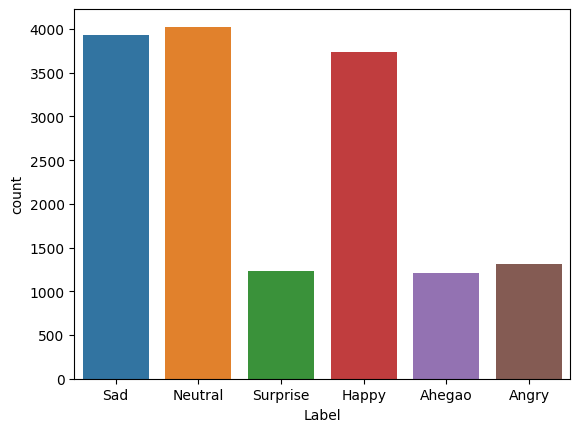

In [8]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 0);

# **PREPROCESSING**

Dataset Splitting -- 80/20 Ratio

In [9]:
train_data_dir =image_data
batch_size = 64
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 15453 files belonging to 6 classes.
Using 12363 files for training.
Found 15453 files belonging to 6 classes.
Using 3090 files for validation.


In [10]:
train_size = len(train)
val_size = len(validation)
total = train_size + val_size

print(f'train samples count:\t\t{train_size}\t({(100 * train_size/total):.2f}%)')
print(f'validation samples count:\t{val_size}\t({(100 * val_size/total):.2f}%)')
print('================================================')
print(f'Total:\t\t\t\t{total}\t({(100 * total/total):.2f}%)')

train samples count:		194	(79.84%)
validation samples count:	49	(20.16%)
Total:				243	(100.00%)


Classes names in train data


In [11]:
class_names=train.class_names
class_names

['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

Classes names in test data


In [12]:
class2_names=validation.class_names
class2_names

['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

View some images and thier labels


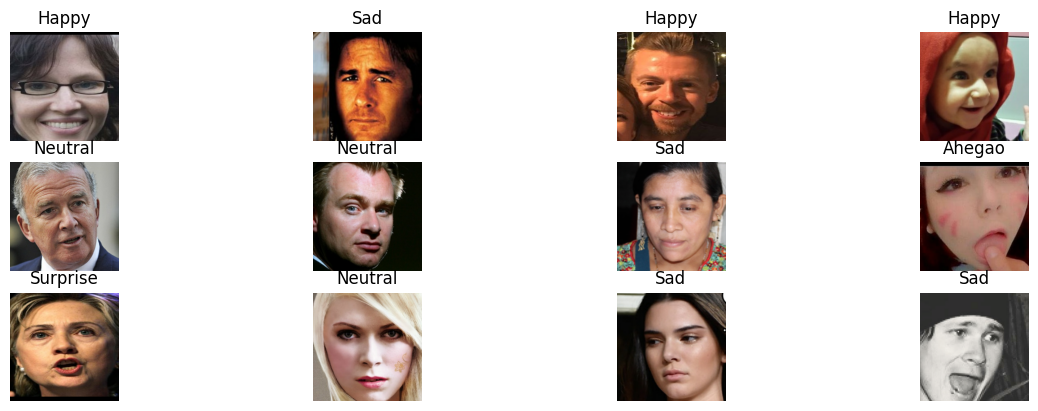

In [13]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(12):
        ax = plt.subplot(12, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# **Models**


## **EfficientNetV2**

In [14]:
# Base EfficientNetV2M model
base_model = tf.keras.applications.EfficientNetV2M(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(6,activation=tf.nn.softmax))
# Explicitly build the model
keras_model.build((None, 224, 224, 3)) 
# Display model summary
keras_model.summary()

214201816/214201816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-m (Functional)   │ (None, 7, 7, 1280)     │    53,150,388 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │       376,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,526,714 (204.19 MB)

 Trainable params: 376,326 (1.44 MB)

 Non-trainable params: 53,150,388 (202.75 MB)

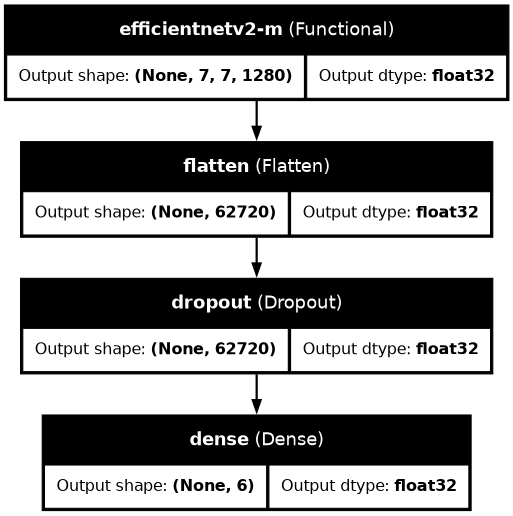

In [15]:
# Plot the model
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True, show_dtype=True, dpi=80)

**ModelCheckpoint, EaarlyStopping and Patience**

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [17]:
# Compile the model
keras_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = keras_model.fit(
    train,  
    epochs=50,
    validation_data=validation, 
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50


I0000 00:00:1713699408.466573      92 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713699408.624025      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.5006 - loss: 2.3217

W0000 00:00:1713699570.835521      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


194/194 ━━━━━━━━━━━━━━━━━━━━ 326s 995ms/step - accuracy: 0.5009 - loss: 2.3210 - val_accuracy: 0.6903 - val_loss: 1.4446
Epoch 2/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 76s 384ms/step - accuracy: 0.6669 - loss: 1.5442 - val_accuracy: 0.7388 - val_loss: 1.2911
Epoch 3/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 76s 384ms/step - accuracy: 0.6930 - loss: 1.5789 - val_accuracy: 0.7935 - val_loss: 0.9347
Epoch 4/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 74s 373ms/step - accuracy: 0.7255 - loss: 1.4385 - val_accuracy: 0.8039 - val_loss: 0.9418
Epoch 5/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 76s 385ms/step - accuracy: 0.7228 - loss: 1.5979 - val_accuracy: 0.8129 - val_loss: 0.8792
Epoch 6/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 76s 386ms/step - accuracy: 0.7560 - loss: 1.3768 - val_accuracy: 0.8317 - val_loss: 0.8249
Epoch 7/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 74s 372ms/step - accuracy: 0.7626 - loss: 1.3468 - val_accuracy: 0.8052 - val_loss: 1.0424
Epoch 8/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 76s 386ms/step - accuracy: 0.7548 - loss: 1.5652 - va

Model Train Accuracy

In [18]:
train_score, train_acc = keras_model.evaluate(train)
print('Training Loss =', train_score)
print('Training Accuracy =', train_acc)

194/194 ━━━━━━━━━━━━━━━━━━━━ 66s 332ms/step - accuracy: 0.9029 - loss: 0.3947
Training Loss = 0.3475947380065918
Training Accuracy = 0.9115910530090332


Model Test Accuracy

In [19]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.8743 - loss: 0.7563
Test Loss = 0.7563268542289734
Test Accuracy = 0.8711974024772644


Confusion Matrix

In [20]:
# Predict labels for validation data
val_predictions = np.argmax(keras_model.predict(validation), axis=-1)
val_true_labels = np.concatenate([y for x, y in validation], axis=0)  # Extract labels from validation dataset

# Compute confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_predictions)
print('Confusion Matrix:')
print(conf_matrix)

49/49 ━━━━━━━━━━━━━━━━━━━━ 44s 584ms/step
Confusion Matrix:
[[ 12  29  55  48  70  15]
 [ 16  24  51  62  79  18]
 [ 70  61 146 176 215  58]
 [ 65  66 205 191 210  73]
 [ 53  63 192 192 241  76]
 [ 14  26  70  54  68  26]]


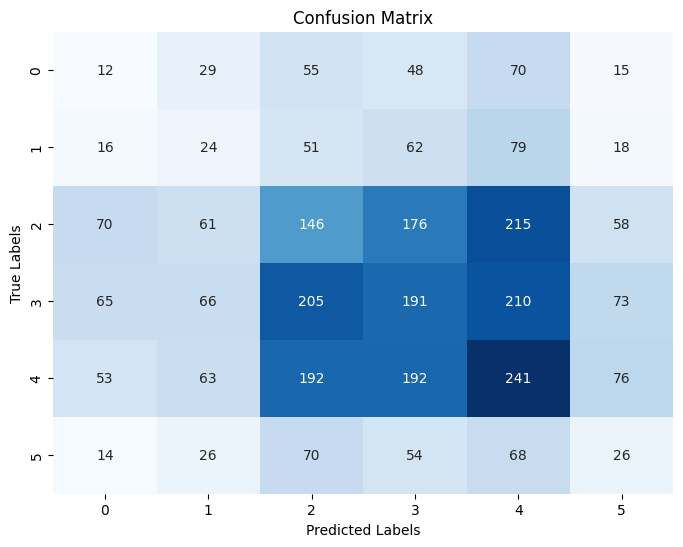

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report

In [26]:
from sklearn.metrics import classification_report
report = classification_report(val_true_labels, val_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.05      0.05      0.05       229
           1       0.09      0.10      0.09       250
           2       0.20      0.20      0.20       726
           3       0.26      0.24      0.25       810
           4       0.27      0.29      0.28       817
           5       0.10      0.10      0.10       258

    accuracy                           0.21      3090
   macro avg       0.16      0.16      0.16      3090
weighted avg       0.21      0.21      0.21      3090



In [27]:
hist_=pd.DataFrame(hist.history)
hist_

,accuracy,loss,val_accuracy,val_loss
0,0.549139,2.189882,0.690291,1.444566
1,0.663027,1.643502,0.738835,1.291088
2,0.697808,1.549023,0.793527,0.934736
3,0.728383,1.435470,0.803883,0.941759
4,0.729192,1.552765,0.812945,0.879167
5,0.755076,1.381577,0.831715,0.824857
6,0.763164,1.380476,0.805178,1.042390
7,0.766966,1.436119,0.845307,0.780172
8,0.781525,1.351705,0.844013,0.908183
9,0.786217,1.344839,0.871197,0.747216


# Plot the scores

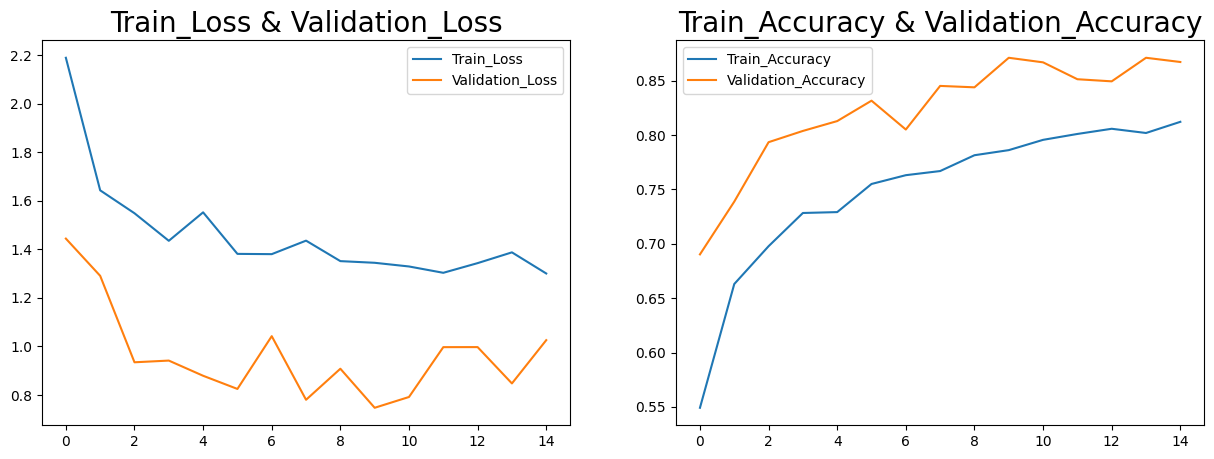

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

# **Mobile Net**

Base MobileNetV2 model


In [38]:
base_model_MobileNet = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
#base_model_MobileNet.trainable = False

In [39]:
keras_model_MobileNet = keras.models.Sequential([
    base_model_MobileNet,
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation=tf.nn.softmax)
])

# Explicitly build the model
keras_model_MobileNet.build((None, 224, 224, 3))

# Display model summary
keras_model_MobileNet.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │       376,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,634,310 (10.05 MB)

 Trainable params: 2,600,198 (9.92 MB)

 Non-trainable params: 34,112 (133.25 KB)

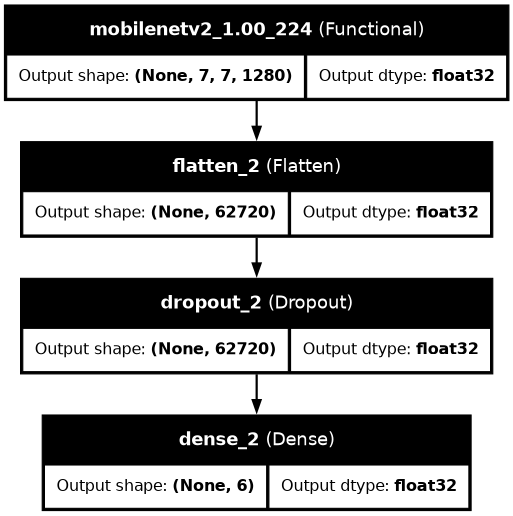

In [40]:
# Plot the model
tf.keras.utils.plot_model(keras_model_MobileNet, to_file='model.png', show_shapes=True, show_layer_names=True, show_dtype=True, dpi=80)


In [43]:
# Callbacks
checkpoint = ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [51]:
# Compile the model
keras_model_MobileNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
# Train the model
hist_MobileNet = keras_model_MobileNet.fit(
    train,
    epochs=50,
    validation_data=validation,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50


W0000 00:00:1713701986.314672      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.4998 - loss: 2.1651

W0000 00:00:1713702058.910437      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


194/194 ━━━━━━━━━━━━━━━━━━━━ 157s 441ms/step - accuracy: 0.5002 - loss: 2.1621 - val_accuracy: 0.0806 - val_loss: 39.0165
Epoch 2/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 237ms/step - accuracy: 0.6789 - loss: 1.0088 - val_accuracy: 0.2350 - val_loss: 54.3868
Epoch 3/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 236ms/step - accuracy: 0.7652 - loss: 0.6206 - val_accuracy: 0.2350 - val_loss: 141.7370
Epoch 4/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 48s 238ms/step - accuracy: 0.7881 - loss: 0.6244 - val_accuracy: 0.2356 - val_loss: 75.2163
Epoch 5/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 235ms/step - accuracy: 0.7845 - loss: 0.6164 - val_accuracy: 0.2427 - val_loss: 92.2490
Epoch 6/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 49s 243ms/step - accuracy: 0.7598 - loss: 0.7080 - val_accuracy: 0.3563 - val_loss: 32.4911
Epoch 7/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 47s 235ms/step - accuracy: 0.8217 - loss: 0.5071 - val_accuracy: 0.2427 - val_loss: 346.5160
Epoch 8/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 48s 239ms/step - accuracy: 0.6442 - loss: 1.

Evaluate model on training data

In [54]:
train_loss_MobileNet, train_acc_MobileNet = keras_model_MobileNet.evaluate(train)
print('Training Loss:', train_loss_MobileNet)
print('Training Accuracy:', train_acc_MobileNet)

194/194 ━━━━━━━━━━━━━━━━━━━━ 31s 154ms/step - accuracy: 0.2373 - loss: 8.3236
Training Loss: 7.994046688079834
Training Accuracy: 0.24136535823345184


Evaluate model on validation data


In [55]:
val_loss_MobileNet, val_acc_MobileNet = keras_model_MobileNet.evaluate(validation)
print('Validation Loss:', val_loss_MobileNet)
print('Validation Accuracy:', val_acc_MobileNet)

49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.2429 - loss: 8.1104
Validation Loss: 8.094842910766602
Validation Accuracy: 0.23980583250522614


Confusion Matrix

In [56]:
# Predict labels for validation data
val_predictions_MobileNet = np.argmax(keras_model_MobileNet.predict(validation), axis=-1)
val_true_labels_MobileNet = np.concatenate([y for x, y in validation], axis=0)  # Extract labels from validation dataset

# Compute confusion matrix
conf_matrix_MobileNet = confusion_matrix(val_true_labels_MobileNet, val_predictions_MobileNet)
print('Confusion Matrix:')
print(conf_matrix_MobileNet)

49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step
Confusion Matrix:
[[  0  10  48 138  33   0]
 [  0   9  56 154  29   2]
 [  1  25 137 470  93   0]
 [  1  30 155 530  92   2]
 [  0  36 145 531 102   3]
 [  1  11  41 176  29   0]]


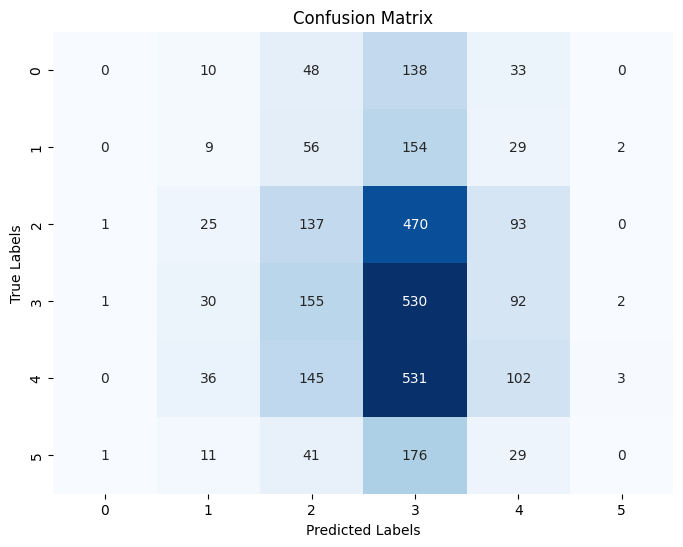

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_MobileNet, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [58]:
from sklearn.metrics import classification_report
report_MobileNet = classification_report(val_true_labels_MobileNet, val_predictions_MobileNet)
print(report_MobileNet)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       229
           1       0.07      0.04      0.05       250
           2       0.24      0.19      0.21       726
           3       0.27      0.65      0.38       810
           4       0.27      0.12      0.17       817
           5       0.00      0.00      0.00       258

    accuracy                           0.25      3090
   macro avg       0.14      0.17      0.13      3090
weighted avg       0.20      0.25      0.20      3090



In [59]:
hist__MobileNet=pd.DataFrame(hist_MobileNet.history)
hist__MobileNet

,accuracy,loss,val_accuracy,val_loss
0,0.573324,1.575668,0.080583,39.016460
1,0.712125,0.851996,0.234951,54.386765
2,0.772143,0.611902,0.234951,141.736954
3,0.781202,0.645738,0.235599,75.216331
4,0.793578,0.609875,0.242718,92.249031
5,0.788724,0.590945,0.356311,32.491108
6,0.809027,0.569197,0.242718,346.515991
7,0.608914,1.408318,0.146602,42.002785
8,0.417860,2.791137,0.239806,8.127798
9,0.481679,1.796435,0.262136,85.266769


# Plot the scores

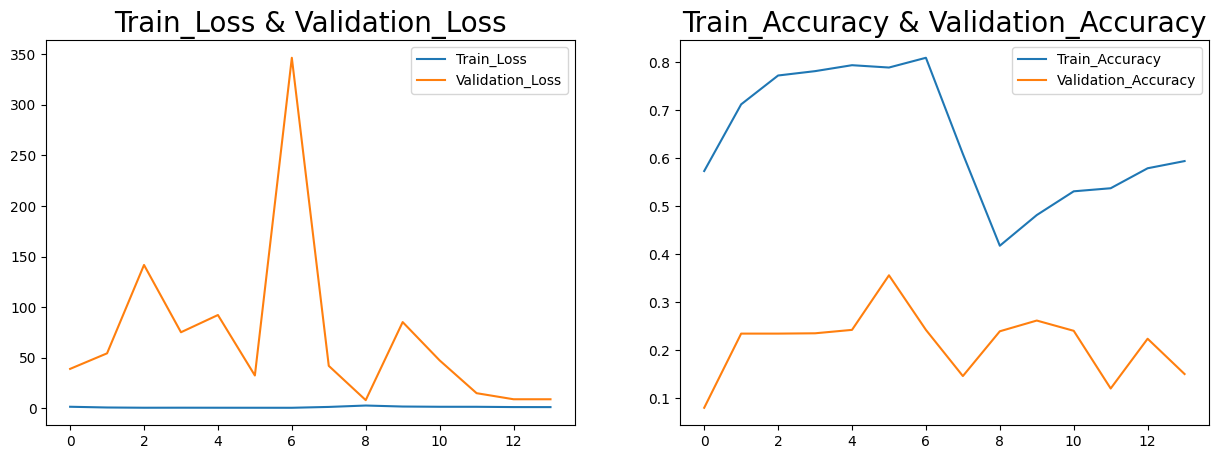

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist__MobileNet['loss'],label='Train_Loss')
plt.plot(hist__MobileNet['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist__MobileNet['accuracy'],label='Train_Accuracy')
plt.plot(hist__MobileNet['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

## **Alex Net**

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


Define AlexNet model

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define AlexNet model
alexnet_model = Sequential([
    # Convolutional layers
    Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(filters=256, kernel_size=(5, 5), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding="same"),
    Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding="same"),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    # Flatten layer
    Flatten(),
    # Dense layers
    Dense(units=9216, activation='relu'),
    Dense(units=4096, activation='relu'),
    Dense(units=4096, activation='relu'),
    Dense(units=6, activation='softmax')
])


Compile the model

In [53]:
alexnet_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
alexnet_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 9216)           │    58,991,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,297,542 (447.45 MB)

 Trainable params: 117,297,542 (447.45 MB)

 Non-trainable params: 0 (0.00 B)

ModelCheckpoint, EaarlyStopping and Patience

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

alexnet_checkpoint = ModelCheckpoint("alexnet_model.keras", save_best_only=True)
alexnet_early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


Train the model

In [63]:
history = alexnet_model.fit(
    train,
    epochs=20,
    validation_data=validation,
)

Epoch 1/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.2626 - loss: 1.6623 - val_accuracy: 0.2621 - val_loss: 1.6446
Epoch 2/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 42s 212ms/step - accuracy: 0.2621 - loss: 1.6615 - val_accuracy: 0.2621 - val_loss: 1.6502
Epoch 3/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 41s 206ms/step - accuracy: 0.2624 - loss: 1.6612 - val_accuracy: 0.2621 - val_loss: 1.6486
Epoch 4/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.2611 - loss: 1.6637 - val_accuracy: 0.2621 - val_loss: 1.6475
Epoch 5/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 42s 211ms/step - accuracy: 0.2611 - loss: 1.6640 - val_accuracy: 0.2621 - val_loss: 1.6479
Epoch 6/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 40s 201ms/step - accuracy: 0.2617 - loss: 1.6634 - val_accuracy: 0.2621 - val_loss: 1.6488
Epoch 7/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 42s 211ms/step - accuracy: 0.2580 - loss: 1.6608 - val_accuracy: 0.2621 - val_loss: 1.6487
Epoch 8/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 40s 201ms/step - accuracy: 0.2618 - loss: 1

Model Train Accuracy

In [64]:
train_score_alex, train_acc_alex = alexnet_model.evaluate(train)
print('Training Loss =', train_score_alex)
print('Training Accuracy =', train_acc_alex)

194/194 ━━━━━━━━━━━━━━━━━━━━ 36s 177ms/step - accuracy: 0.2637 - loss: 1.6640
Training Loss = 1.6552890539169312
Training Accuracy = 0.2616678774356842


Model Test Accuracy

In [65]:
score_alex, acc_alex = alexnet_model.evaluate(validation)
print('Test Loss  =', score_alex)
print('Test Accuracy =', acc_alex)

49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.2521 - loss: 1.6606
Test Loss  = 1.6486256122589111
Test Accuracy = 0.26213592290878296


Confusion Matrix

In [66]:
# Predict labels for validation data
val_predictions_alex = np.argmax(alexnet_model.predict(validation), axis=-1)
val_true_labels_alex = np.concatenate([y for x, y in validation], axis=0)  # Extract labels from validation dataset

# Compute confusion matrix
conf_matrix_alex = confusion_matrix(val_true_labels_alex, val_predictions_alex)
print('Confusion Matrix:')
print(conf_matrix_alex)

49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step
Confusion Matrix:
[[  0   0   0 229   0   0]
 [  0   0   0 250   0   0]
 [  0   0   0 726   0   0]
 [  0   0   0 810   0   0]
 [  0   0   0 817   0   0]
 [  0   0   0 258   0   0]]


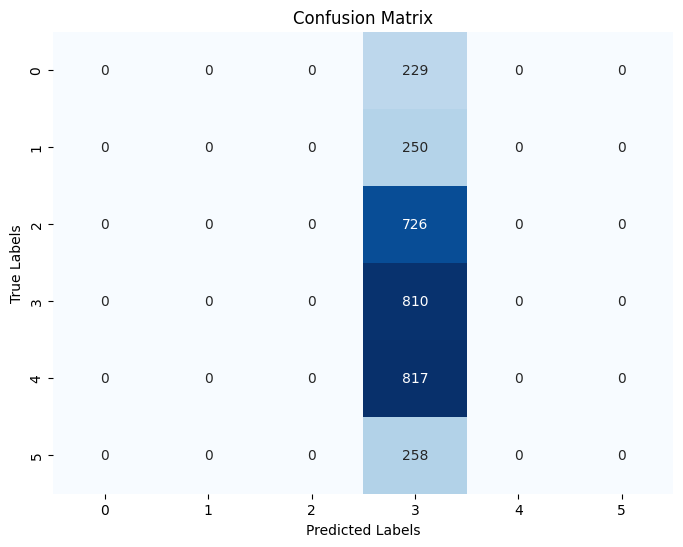

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_alex, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Classification Report

In [68]:
from sklearn.metrics import classification_report
report_alex = classification_report(val_true_labels_alex, val_predictions_alex)
print(report_alex)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       229
           1       0.00      0.00      0.00       250
           2       0.00      0.00      0.00       726
           3       0.26      1.00      0.42       810
           4       0.00      0.00      0.00       817
           5       0.00      0.00      0.00       258

    accuracy                           0.26      3090
   macro avg       0.04      0.17      0.07      3090
weighted avg       0.07      0.26      0.11      3090



In [69]:
hist__alex=pd.DataFrame(history.history)
hist__alex

,accuracy,loss,val_accuracy,val_loss
0,0.260131,1.653963,0.262136,1.644639
1,0.261668,1.654564,0.262136,1.650206
2,0.256815,1.653981,0.262136,1.648586
3,0.261668,1.655285,0.262136,1.647548
4,0.260535,1.654504,0.262136,1.647916
5,0.259727,1.653734,0.262136,1.648782
6,0.258432,1.654386,0.262136,1.648707
7,0.257785,1.655346,0.262136,1.648321
8,0.260859,1.655851,0.262136,1.646927
9,0.256329,1.653899,0.262136,1.649845


# Plot the scores

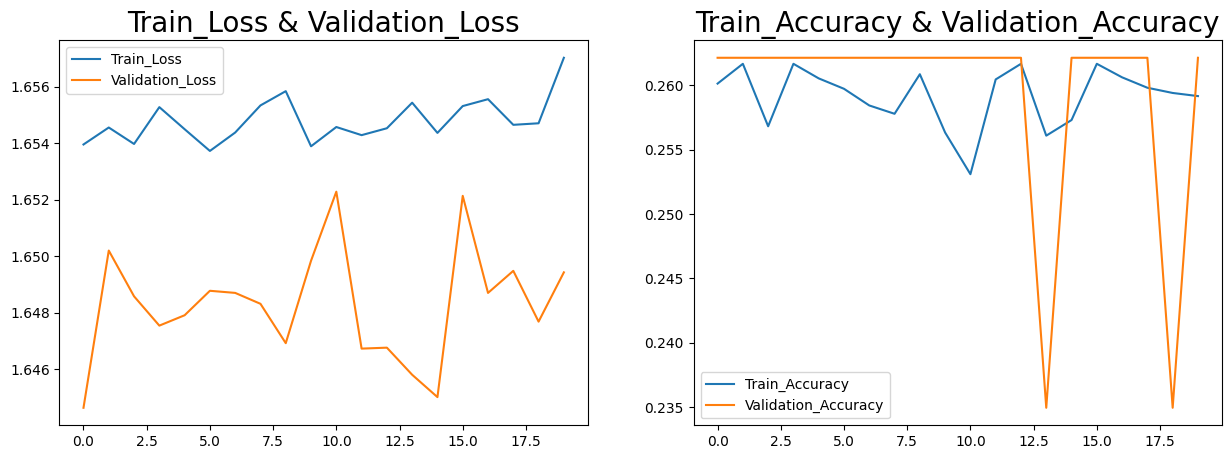

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist__alex['loss'],label='Train_Loss')
plt.plot(hist__alex['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist__alex['accuracy'],label='Train_Accuracy')
plt.plot(hist__alex['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()